### Prepare soiltype input for discretization ###
Prepare soiltype input data for the basin area. This step includes:<br>
1. project full-domain soiltype raster into a specified projection system
2. extract soiltype input for the basin area
3. check basin soiltype

In [1]:
# import libraries
import os,sys
sys.path.append('../')
import functions.geospatial_analysis as ga
import functions.geospatial_plot as gp
import functions.utils as ut
import rasterio as rio
from rasterio.warp import Resampling

In [3]:
# common paths
control_file    = '../../control/control.txt.taylorpark'
basin_data_path = ut.read_from_control(control_file, 'basin_data_path')
basin_name      = ut.read_from_control(control_file, 'basin_name')
plot_path       = os.path.join(basin_data_path, 'plots/')

In [4]:
# define equal area projection system
new_epsg = ut.read_from_control(control_file, 'epsg') 
dest_crs = rio.crs.CRS.from_epsg(new_epsg)

In [5]:
# full-domain data
soiltype_raster       = ut.read_from_control(control_file, 'fulldom_soiltype_raster')

# basin data
basin_gru_shp         = ut.set_filename(control_file, 'basin_gru_shp')
basin_flowline_shp    = ut.set_filename(control_file, 'basin_flowlines_shp')
basin_soiltype_raster = ut.set_filename(control_file, 'basin_soiltype_raster')

# derived filenames
basin_gru_prj_shp     = basin_gru_shp.split('.shp')[0]+'_prj.shp'
soiltype_prj_raster   = soiltype_raster.split('.tif')[0]+'_prj.tif'

#### 1. Reproject full-domain soiltype #### 

In [6]:
# if this is slow, the file can be prepared externally using gdalwarp -t_srs EPSG:<epsg> <input_tif> <output_tif>
# (issue: the reprojected filesize may balloons by a factor of 200 due to substandard compression)
if not os.path.exists(soiltype_raster):
    ga.reproject_raster(soiltype_raster, soiltype_prj_raster, dest_crs, Resampling.nearest)    
print('reprojected soiltype raster:', soiltype_prj_raster)

reprojected soiltype raster: /glade/work/andywood/complexity/source_data/usda_mode_soilclass_vCompressed_NA_250m_ll_prj.tif


#### 2. Extract basin soiltype ####

In [7]:
if not os.path.exists(basin_soiltype_raster):
    ga.crop_raster(soiltype_prj_raster, basin_gru_prj_shp, basin_soiltype_raster) 
print('cropped basin soiltype raster:', basin_soiltype_raster)

cropped basin soiltype raster: /glade/work/andywood/complexity/basins/smada/taylorpark/gis/soiltype.tif


#### 3. Check domain soil ####

data_unique: [0. 3. 8.]
data_counts: [18027  1970  9332]


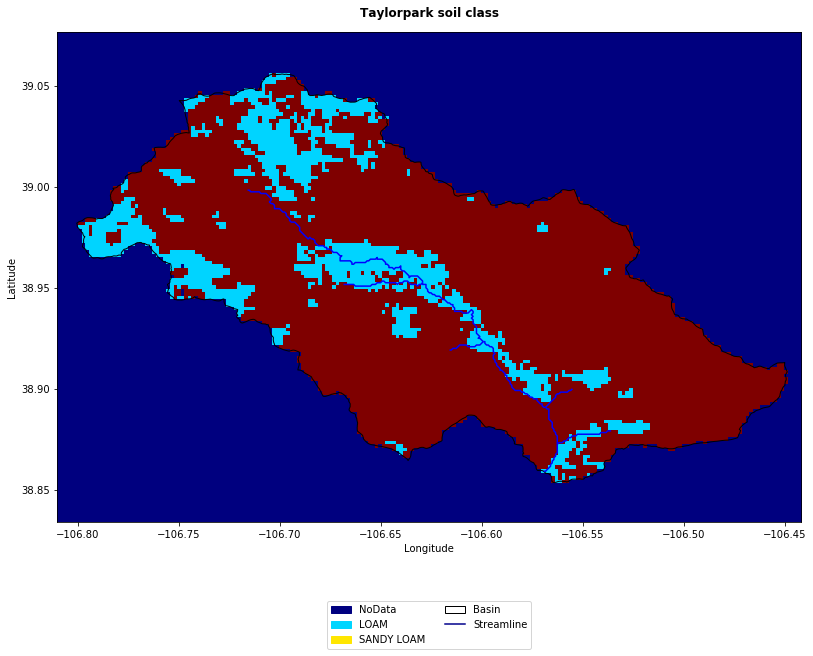

In [8]:
# plot settings
wgs_crs  = 'epsg:4326'
wgs_epsg = 4326
figsize  = (15,15*0.6) # width, height in inches
title    = basin_name.capitalize() + ' soil class'
leg_ncol = 2
leg_loc  = 'upper center'
leg_bbox_to_anchor=(0.5,-0.15)

legend_dict = {0: "NoData",
               1: 'CLAY',
               2: 'CLAY LOAM',
               3: 'LOAM',
               4: 'LOAMY SAND',
               5: 'SAND',
               6: 'SANDY CLAY',
               7: 'SANDY CLAY LOAM',
               8: 'SANDY LOAM',
               9: 'SILT',
               10: 'SILTY CLAY',
               11: 'SILTY CLAY LOAM',
               12: 'SILT LOAM'}   

# plot classified aspect
output_fig_file = os.path.join(plot_path, 'soiltype_and_bound_stream.png')   
cmap_str = 'jet'

gp.plot_raster_and_bound_stream(basin_soiltype_raster, basin_gru_prj_shp, basin_flowline_shp, wgs_epsg, cmap_str, legend_dict,
                                figsize, title, leg_loc, leg_bbox_to_anchor, leg_ncol, output_fig_file)